In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from random import random
%matplotlib inline

In [2]:
df = pd.read_csv('imdb_dataset.csv')
df.head()

,imdb_title_id,title,year,genre,duration,country,avg_vote,votes,budget,metascore,reviews_from_users,reviews_from_critics
0,tt0002101,Cleopatra,1912,"Drama, History",100,USA,5.2,446,45000.0,NaN,25.0,3.0
1,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",60,USA,5.7,484,NaN,NaN,13.0,5.0
2,tt0002461,Richard III,1912,Drama,55,"France, USA",5.5,225,30000.0,NaN,8.0,1.0
3,tt0003167,Amore di madre,1914,Drama,55,USA,5.8,187,NaN,NaN,6.0,NaN
4,tt0003419,Lo studente di Praga,1913,"Drama, Fantasy, Horror",85,Germany,6.5,1768,NaN,NaN,20.0,26.0


## Version with one column

In [3]:
df1 = df[['avg_vote','metascore']]
df1 = df1.dropna()
df1

,avg_vote,metascore
46,7.8,99.0
309,6.5,66.0
348,8.1,90.0
400,7.0,69.0
458,7.1,89.0
...,...,...
47426,5.2,44.0
47427,5.7,68.0
47439,5.8,68.0
47441,6.1,72.0


In [4]:
X = df1['metascore']
y = df1['avg_vote']

## Normalizing our variables

In [5]:
X = np.array((X-X.mean())/X.std())
X

array([ 2.51970144,  0.66105393,  2.01279757, ...,  0.77369923,
        0.99898984, -1.08494828])

In [6]:
y = np.array((y-y.mean())/y.std())
y

array([ 1.56670793,  0.2381542 ,  1.87329725, ..., -0.47722088,
       -0.17063156, -1.19259596])

## To implement a gradient descent algorithm we need to follow 4 steps:
    Randomly initialize the bias and the weight theta
    Calculate predicted value of y that is Y given the bias and the weight
    Calculate the cost function from predicted and actual values of Y
    Calculate gradient and the weights

## a. Randomly initialize the bias and the weight theta

In [7]:
def initialize(x):
    b=random()
    theta=np.random.rand()
    return b,theta
b,theta=initialize(1)
print('Bias:',b,'Weight:',theta)

Bias: 0.3381861932106702 Weight: 0.30853097105711436


## b. Calculate predicted value of y that is Y given the bias and the weight

In [8]:
def preds(b,theta,X):
    return b + np.dot(X,theta)

In [9]:
pred = preds(b,theta,X)
pred

array([1.11559213, 0.5421418 , 0.95919658, ..., 0.57689637, 0.6464055 ,
       0.00344605])

In [10]:
def cost_f(y,pred):
    yres=y-pred
    return np.sum(np.dot(yres.T,yres))/len(y-yres)
cost_f(y,pred)

0.7864287001549485

In [11]:
def update_weights(x,y,pred,b_0,a_o,learning_rate):
    db=(np.sum(pred-y)*2)/len(y)
    dw=(np.dot((pred-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    a_1=a_o-learning_rate*dw
    return b_1,a_1
print("After initialization -Bias: ",b,"Weight: ",theta)
pred=preds(b,theta,X)
b,a=update_weights(X,y,pred,b,theta,0.01)
print("After first update -Bias: ",b,"Weight: ",theta)
cost_f(y,pred)

After initialization -Bias:  0.3381861932106702 Weight:  0.30853097105711436
After first update -Bias:  0.33142246934645714 Weight:  0.30853097105711436


0.7864287001549485

In [38]:
def gradient_descent(X,y,alpha,num_iterations):
    b,a=initialize(X.shape[0])
    iter_num=0
    d = []
    result_idx=0
    for each_iter in range(num_iterations):
        pred = preds(b,theta,X)
        this_cost=cost_f(y,pred)
        prev_b=b
        prev_theta=theta
        b,a=update_weights(X,y,pred,b,theta,alpha)
        d.append({
            'iter_num': iter_num,
            'cost': this_cost})
        result_idx=result_idx+1
        iter_num +=1
        print('Final Estimate of b and theta : ',b,theta)
    return b,theta,d

In [39]:
b,theta,d = gradient_descent(X,y,alpha=0.1,num_iterations=200)

Final Estimate of b and theta :  0.39989379529643676 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.31991503623715234 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.25593202898972484 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.20474562319178283 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.1637964985534292 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.1310371988427463 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.1048297590742 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.08386380725936295 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.06709104580749331 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.053672836645997604 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.04293826931680104 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.03

In [40]:
alpha01 = pd.DataFrame(d)
alpha01

,iter_num,cost
0,0,0.845320
1,1,0.755368
2,2,0.697798
3,3,0.660954
4,4,0.637373
...,...,...
195,195,0.595453
196,196,0.595453
197,197,0.595453
198,198,0.595453


In [41]:
b,a,d = gradient_descent(X,y,alpha=0.01,num_iterations=200)

Final Estimate of b and theta :  0.5486781095567996 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.537704547365664 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.526950456418351 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.5164114472899843 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.5060832183441849 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.4959615539773015 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.4860423228977558 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.47632147643980094 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.4667950469110052 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.4574591459727854 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.44830996305333 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.43934376379

In [42]:
alpha001 = pd.DataFrame(d)
alpha001

,iter_num,cost
0,0,0.908913
1,1,0.896500
2,2,0.884579
3,3,0.873129
4,4,0.862133
...,...,...
195,195,0.595571
196,196,0.595567
197,197,0.595562
198,198,0.595558


In [43]:
b,a,d = gradient_descent(X,y,alpha=0.001,num_iterations=200)

Final Estimate of b and theta :  0.8356009860149285 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.8339297840428986 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.8322619244748128 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.8305974006258633 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.8289362058246116 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.8272783334129624 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.8256237767461365 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.8239725291926443 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.822324584134259 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.8206799349659906 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.8190385750960586 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.817400497

In [44]:
alpha0001 = pd.DataFrame(d)
alpha0001

,iter_num,cost
0,0,1.296483
1,1,1.293682
2,2,1.290891
3,3,1.288112
4,4,1.285345
...,...,...
195,195,0.916558
196,196,0.915275
197,197,0.913997
198,198,0.912724


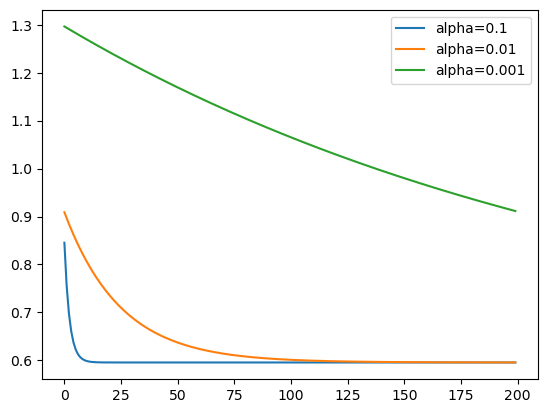

In [45]:
plt.figure()
plt.plot(alpha01['iter_num'],alpha01['cost'],label='alpha=0.1')
plt.legend()
plt.plot(alpha001['iter_num'],alpha001['cost'],label='alpha=0.01')
plt.legend()
plt.plot(alpha0001['iter_num'],alpha0001['cost'],label='alpha=0.001')
plt.legend()

# Version with 3 columns (metascore, reviews from critics, duration):

In [20]:
df2 = df[['avg_vote','metascore','reviews_from_critics','duration']]
df2 = df2.dropna()
df2

,avg_vote,metascore,reviews_from_critics,duration
46,7.8,99.0,77.0,163
309,6.5,66.0,63.0,88
348,8.1,90.0,65.0,72
400,7.0,69.0,43.0,96
458,7.1,89.0,25.0,92
...,...,...,...,...
47426,5.2,44.0,13.0,104
47427,5.7,68.0,37.0,97
47439,5.8,68.0,5.0,113
47441,6.1,72.0,94.0,92


In [21]:
X = df2[['metascore','reviews_from_critics','duration']]
y = df2['avg_vote']

In [22]:
X = np.array((X-X.mean())/X.std())
X

array([[ 2.52000202, -0.26133608,  2.90200561],
       [ 0.66077124, -0.38827079, -0.81177297],
       [ 2.01293908, -0.37013726, -1.60404574],
       ...,
       [ 0.77345189, -0.91414317,  0.42615322],
       [ 0.9988132 , -0.10720107, -0.61370478],
       [-1.0857789 , -0.37920403, -0.81177297]])

In [23]:
y = np.array((y-y.mean())/y.std())
y

array([ 1.56661842,  0.23770948,  1.87328972, ..., -0.47785687,
       -0.17118558, -1.19342323])

## Same steps

In [24]:
def initialize(x):
    b=random()
    theta=np.random.rand(x)
    return b,theta
b,theta=initialize(3) ### this changes depending dimensions
print('Bias:',b,'Weights:',theta)

Bias: 0.5470341647320796 Weights: [0.26311044 0.13148486 0.13930991]


In [25]:
def preds(b,theta,X):
    return b + np.dot(X,theta)

pred = preds(b,theta,X)
pred

array([1.57998942, 0.55675022, 0.80453253, ..., 0.68970881, 0.71024187,
       0.09840679])

In [26]:
def cost_f(y,pred):
    yres=y-pred
    return np.sum(np.dot(yres.T,yres))/len(y-yres)
cost_f(y,pred)

0.9007275485902508

In [27]:
def update_weights(x,y,pred,b_0,a_o,learning_rate):
    db=(np.sum(pred-y)*2)/len(y)
    dw=(np.dot((pred-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    a_1=a_o-learning_rate*dw
    return b_1,a_1
print("After initialization -Bias: ",b,"Weights: ",theta)
pred=preds(b,theta,X)
b,theta=update_weights(X,y,pred,b,theta,0.01)
print("After first update -Bias: ",b,"Weights: ",theta)
cost_f(y,pred)

After initialization -Bias:  0.5470341647320796 Weights:  [0.26311044 0.13148486 0.13930991]
After first update -Bias:  0.5360934814374383 Weights:  [0.27024326 0.13345368 0.14182426]


0.9007275485902508

# Final

In [46]:
def gradient_descent(X,y,alpha,num_iterations):
    b,a=initialize(X.shape[1])
    iter_num=0
    d = []
    result_idx=0
    for each_iter in range(num_iterations):
        pred = preds(b,theta,X)
        this_cost=cost_f(y,pred)
        prev_b=b
        prev_theta=theta
        b,a=update_weights(X,y,pred,b,theta,alpha)
        d.append({
            'iter_num': iter_num,
            'cost': this_cost})
        result_idx=result_idx+1
        iter_num +=1
        print('Final Estimate of b and theta : ',b,theta)
    return b,theta,d

In [47]:
b,theta,d = gradient_descent(X,y,alpha=0.1,num_iterations=200)

Final Estimate of b and theta :  0.04009068165812019 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.032072545326499106 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.02565803626120224 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.020526429008964744 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.01642114320717475 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.013136914565742753 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.01050953165259716 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.00840762532208068 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.006726100257667494 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.0053808802061369445 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.0043047041649125085 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and 

In [48]:
alpha01 = pd.DataFrame(d)
alpha01

,iter_num,cost
0,0,0.597964
1,1,0.597060
2,2,0.596481
3,3,0.596111
4,4,0.595874
...,...,...
195,195,0.595453
196,196,0.595453
197,197,0.595453
198,198,0.595453


In [49]:
b,theta,d = gradient_descent(X,y,alpha=0.01,num_iterations=200)

Final Estimate of b and theta :  0.4223173448964105 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.4138709979984826 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.40559357803851326 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.3974817064777433 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.3895320723481887 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.38174143090122525 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.37410660228320103 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.3666244702375373 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.35929198083278685 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.35210614121613143 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.3450640183918091 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.338

In [50]:
alpha001 = pd.DataFrame(d)
alpha001

,iter_num,cost
0,0,0.781158
1,1,0.773805
2,2,0.766742
3,3,0.759959
4,4,0.753444
...,...,...
195,195,0.595523
196,196,0.595520
197,197,0.595517
198,198,0.595515


In [51]:
b,theta,d = gradient_descent(X,y,alpha=0.001,num_iterations=200)

Final Estimate of b and theta :  0.745519065121871 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.7440280269916273 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.742539970937644 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.7410548909957687 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.7395727812137772 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.7380936356513497 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.736617448380047 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.7351442134832868 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.7336739250563203 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.7322065772062077 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.7307421640517954 [0.27024326 0.13345368 0.14182426]
Final Estimate of b and theta :  0.72928067972

In [52]:
alpha0001 = pd.DataFrame(d)
alpha0001

,iter_num,cost
0,0,1.153481
1,1,1.151251
2,2,1.149030
3,3,1.146818
4,4,1.144615
...,...,...
195,195,0.851057
196,196,0.850035
197,197,0.849018
198,198,0.848005


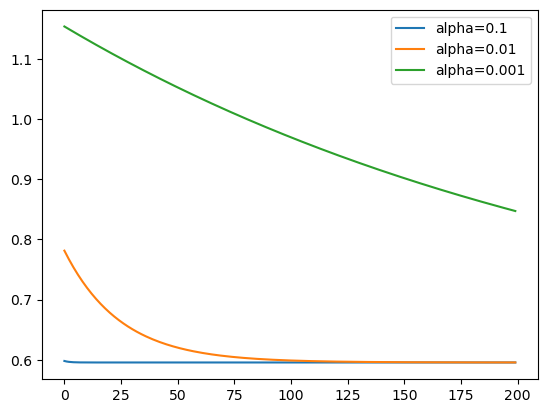

In [53]:
plt.figure()
plt.plot(alpha01['iter_num'],alpha01['cost'],label='alpha=0.1')
plt.legend()
plt.plot(alpha001['iter_num'],alpha001['cost'],label='alpha=0.01')
plt.legend()
plt.plot(alpha0001['iter_num'],alpha0001['cost'],label='alpha=0.001')
plt.legend()